# Airbnb en Nueva York — EDA

Estudio exploratorio del dataset de alquileres de Airbnb en Nueva York (2019) para comprender las variables y preparar los datos para modelado.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pathlib import Path

# División train/test sin depender de sklearn (solo pandas)
def train_test_split(df, test_size=0.2, random_state=42):
    shuffled = df.sample(frac=1, random_state=random_state)
    n = len(shuffled)
    test_n = int(n * test_size)
    return shuffled.iloc[:-test_n], shuffled.iloc[-test_n:]

# Estilo y configuración de gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
%matplotlib inline

In [2]:

ROOT = Path.cwd().parent if Path.cwd().name == "src" else Path.cwd()
RAW_DIR = ROOT / "data" / "raw"
PROCESSED_DIR = ROOT / "data" / "processed"

RAW_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

URL_DS = "https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv"
RAW_PATH = RAW_DIR / "AB_NYC_2019.csv"

In [3]:

if not RAW_PATH.exists():
    response = requests.get(URL_DS)
    response.raise_for_status()
    RAW_PATH.write_text(response.text, encoding="utf-8")
    print(f"Descargado y guardado en {RAW_PATH}")
else:
    print(f"El archivo ya existe en {RAW_PATH}")

El archivo ya existe en c:\Users\Farmatodo Kike\Documents\4Geeks Data science\data-processing-project\data\raw\AB_NYC_2019.csv


In [4]:
# Carga de los datos 
df = pd.read_csv(RAW_PATH)
print(f"Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()

Dimensiones: 48895 filas, 16 columnas


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


---
## Paso 2: EDA completo

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:

missing = pd.DataFrame({
    "count": df.isna().sum(),
    "pct": (df.isna().sum() / len(df) * 100).round(2)
})
missing[missing["count"] > 0].sort_values("count", ascending=False)

,count,pct
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03


In [7]:

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:

cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} únicos")
    print(df[col].value_counts().head(), "\n")

name: 47905 únicos
name
Hillside Hotel                      18
Home away from home                 17
New york Multi-unit building        16
Brooklyn Apartment                  12
Loft Suite @ The Box House Hotel    11
Name: count, dtype: int64 

host_name: 11452 únicos
host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: count, dtype: int64 

neighbourhood_group: 5 únicos
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64 

neighbourhood: 221 únicos
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: count, dtype: int64 

room_type: 3 únicos
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64 

last_review: 1764 únicos
last_review
2019-06-23    1413
2019-0

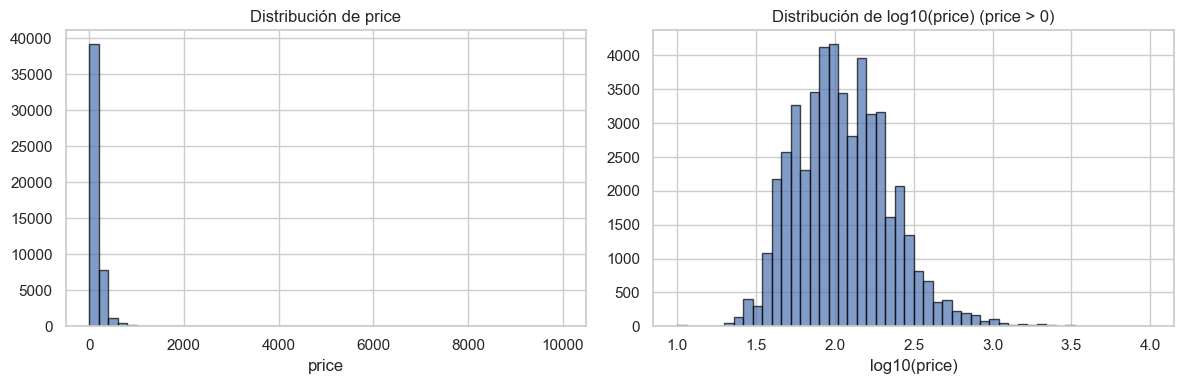

In [9]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df["price"].hist(bins=50, ax=axes[0], edgecolor="black", alpha=0.7)
axes[0].set_title("Distribución de price")
axes[0].set_xlabel("price")
# Precio en escala log para ver mejor la forma (excluyendo 0)
df.loc[df["price"] > 0, "price"].apply(np.log10).hist(bins=50, ax=axes[1], edgecolor="black", alpha=0.7)
axes[1].set_title("Distribución de log10(price) (price > 0)")
axes[1].set_xlabel("log10(price)")
plt.tight_layout()
plt.show()

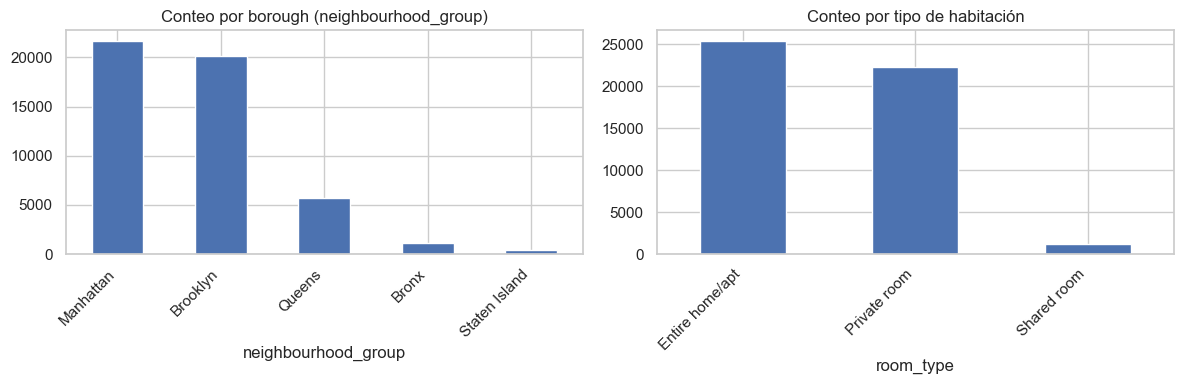

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df["neighbourhood_group"].value_counts().plot(kind="bar", ax=axes[0])
axes[0].set_title("Conteo por borough (neighbourhood_group)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
df["room_type"].value_counts().plot(kind="bar", ax=axes[1])
axes[1].set_title("Conteo por tipo de habitación")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

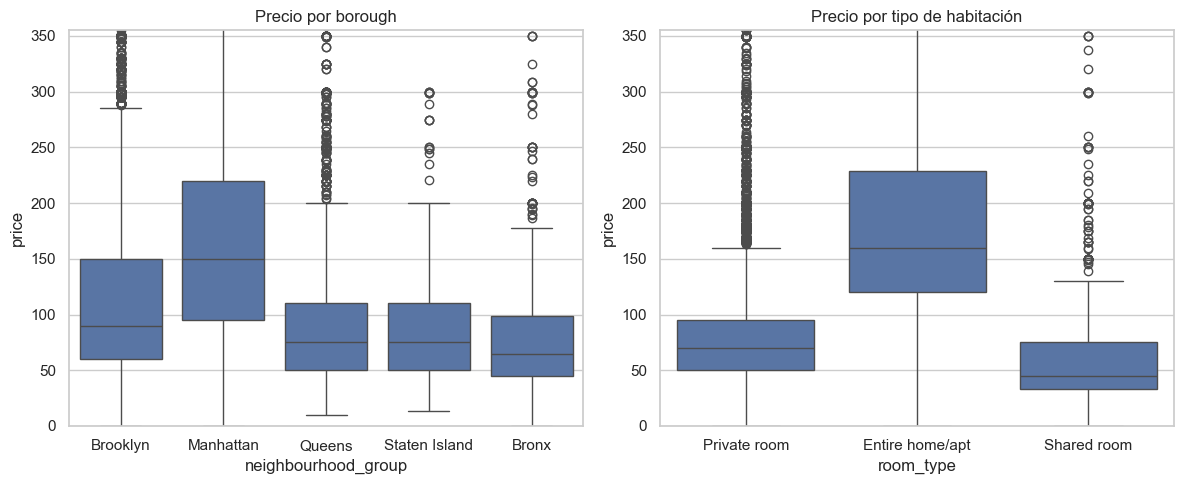

In [11]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, x="neighbourhood_group", y="price", ax=axes[0])
axes[0].set_ylim(0, df["price"].quantile(0.95))  # Recortar outliers para visualizar mejor
axes[0].set_title("Precio por borough")
sns.boxplot(data=df, x="room_type", y="price", ax=axes[1])
axes[1].set_ylim(0, df["price"].quantile(0.95))
axes[1].set_title("Precio por tipo de habitación")
plt.tight_layout()
plt.show()

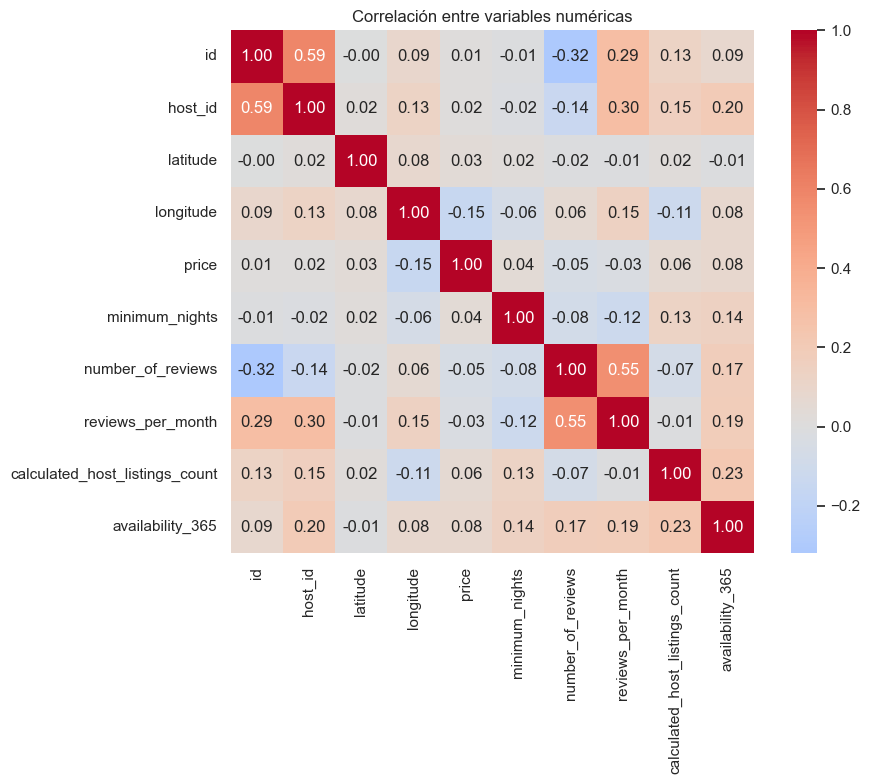

In [12]:

num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Correlación entre variables numéricas")
plt.tight_layout()
plt.show()

### Conclusiones EDA y selección de variables

- **Eliminar** columnas que no aportan para modelado: `id` (identificador), `name` (texto libre), `host_name` (identificación personal), `last_review` (fecha cruda; si se usa, convertir a antigüedad).
- **Tratar valores faltantes**: `reviews_per_month` y `last_review` tienen los mismos NA (listings sin reseñas); podemos rellenar `reviews_per_month` con 0.
- **Conservar** para análisis/modelado: variables de ubicación, `room_type`, `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365`.
- **División train/test** con `train_test_split` (p. ej. 80/20) para evaluación consistente.

In [13]:
# Columnas a eliminar 
drop_cols = ["id", "name", "host_name", "last_review"]
df_clean = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")

# Rellenar NA en reviews_per_month con 0 
if "reviews_per_month" in df_clean.columns:
    df_clean["reviews_per_month"] = df_clean["reviews_per_month"].fillna(0)

print("Columnas restantes:", list(df_clean.columns))
df_clean.info()

Columnas restantes: ['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-n

In [14]:
# División en train y test 
train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=42)
print(f"Train: {len(train_df)} filas | Test: {len(test_df)} filas")

Train: 39116 filas | Test: 9779 filas


---
## Paso 3: Guardar conjuntos procesados



In [15]:

train_path = PROCESSED_DIR / "train.csv"
test_path = PROCESSED_DIR / "test.csv"
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)
print(f"Guardado: {train_path}")
print(f"Guardado: {test_path}")

Guardado: c:\Users\Farmatodo Kike\Documents\4Geeks Data science\data-processing-project\data\processed\train.csv
Guardado: c:\Users\Farmatodo Kike\Documents\4Geeks Data science\data-processing-project\data\processed\test.csv
